In [25]:
! pip install pydicom

In [29]:
! python --version

Python 3.7.3


In [101]:
from glob import glob
import os, sys
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

input_fold = '/Users/felix/Downloads/CT'
output_fold = '/Users/felix/Downloads/CT_output'
base_fold = f'{input_fold}/**/*.dcm'
print(base_fold)
sub_fold = set([ os.path.dirname(file) for file in glob(base_fold, recursive=True)])

meta = []

for sn, series in enumerate(sub_fold):
    #print(series)
    try:
        file_list = sorted(glob(f'{series}/*.dcm'))
        file_cnt = len(file_list)
        img_numpy = None
        for sid, instance in enumerate(file_list):
            #print(sn, instance)
            ds = pydicom.dcmread(instance)
            img = ds.pixel_array#.shape
#             sid = ds.SeriesInstanceUID
#             z = ds.SpacingBetweenSlices  #= z
#             [x, y] = ds.PixelSpacing
            #print(f'seriesFold:{os.path.basename(file)},  PixelSpacing={ds.PixelSpacing} , SpacingBetweenSlices={ds.SpacingBetweenSlices}, Series:')
            #print(img.shape)
            if file_cnt > 1:
                img_numpy = np.zeros((file_cnt, *img.shape)) if img_numpy is None else  img_numpy
                #print(file_cnt, img_numpy.shape, img.shape, img_numpy.dtype, img.dtype)
                img_numpy[sid] = img
            else:
                img_numpy = img
            meta.append({
                'series':os.path.basename(series),
                'sid':sid, #Z-index
                'StudyInstanceUID':ds.StudyInstanceUID,
                'SeriesInstanceUID':ds.SeriesInstanceUID,
                'SOPInstanceUID':ds.SOPInstanceUID,
                'SpacingBetweenSlices':ds.SpacingBetweenSlices if 'SpacingBetweenSlices' in dir(ds) else None,
                
                'ImagePositionPatient':ds.ImagePositionPatient if 'ImagePositionPatient' in dir(ds) else None,
                'SliceLocation':ds.SliceLocation if 'SliceLocation' in dir(ds) else None,
                'PixelSpacing':ds.PixelSpacing if 'PixelSpacing' in dir(ds) else None,
                'RescaleIntercept':ds.RescaleIntercept if 'RescaleIntercept' in dir(ds) else None,
                'RescaleSlope':ds.RescaleSlope if 'RescaleSlope' in dir(ds) else None,
                
        

            })
        save_path = series.replace(input_fold, output_fold)
        os.makedirs(save_path,  exist_ok=True)
        filename = os.path.basename(save_path)
        save_path = f'{save_path}/{filename}'
        np.savez_compressed(save_path, img_numpy)
        #print(save_path)
        #break
    except Exception as e:
        pass
        raise(e)
        
df = pd.DataFrame(meta)
df.head()

/Users/felix/Downloads/CT/**/*.dcm


,series,sid,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,SpacingBetweenSlices,ImagePositionPatient,SliceLocation,PixelSpacing,RescaleIntercept,RescaleSlope
0,ead64f9269f2200e1d439960a1e069b4,0,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.184405249673...,None,"[-151, -160, 1566.80005]",115.7,"[0.625, 0.625]",-1000.0,1.0
1,ead64f9269f2200e1d439960a1e069b4,1,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.149641400647...,None,"[-151, -160, 1467.80005]",214.7,"[0.625, 0.625]",-1000.0,1.0
2,ead64f9269f2200e1d439960a1e069b4,2,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.643499772863...,None,"[-151, -160, 1408.40002]",274.1,"[0.625, 0.625]",-1000.0,1.0
3,ead64f9269f2200e1d439960a1e069b4,3,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.269483043784...,None,"[-151, -160, 1352.59998]",329.9,"[0.625, 0.625]",-1000.0,1.0
4,ead64f9269f2200e1d439960a1e069b4,4,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.240559130655...,None,"[-151, -160, 1401.19995]",281.3,"[0.625, 0.625]",-1000.0,1.0


In [117]:
df.sort_values('SpacingBetweenSlices')

,series,sid,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,SpacingBetweenSlices,ImagePositionPatient,SliceLocation,PixelSpacing,RescaleIntercept,RescaleSlope
0,ead64f9269f2200e1d439960a1e069b4,0,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.184405249673...,None,"[-151, -160, 1566.80005]",115.7,"[0.625, 0.625]",-1000.0,1.0
1,ead64f9269f2200e1d439960a1e069b4,1,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.149641400647...,None,"[-151, -160, 1467.80005]",214.7,"[0.625, 0.625]",-1000.0,1.0
2,ead64f9269f2200e1d439960a1e069b4,2,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.643499772863...,None,"[-151, -160, 1408.40002]",274.1,"[0.625, 0.625]",-1000.0,1.0
3,ead64f9269f2200e1d439960a1e069b4,3,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.269483043784...,None,"[-151, -160, 1352.59998]",329.9,"[0.625, 0.625]",-1000.0,1.0
4,ead64f9269f2200e1d439960a1e069b4,4,2.25.92967625313453514769305696757359279942870...,2.25.12975167617331895234382743835385674935002...,1.3.6.1.4.1.14519.5.2.1.7009.9004.240559130655...,None,"[-151, -160, 1401.19995]",281.3,"[0.625, 0.625]",-1000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
458,fb7ae70f05b6441ac4ea7187ce7c45f7,141,2.25.22721701165212271494380428073098938770189...,2.25.25736286316205170643373429359029852462091...,1.2.840.113654.2.55.36266953585125904284325335...,None,"[-194.61914, -350.61914, 230.6]",-230.6,"[0.76171875, 0.76171875]",-1024.0,1.0
459,fb7ae70f05b6441ac4ea7187ce7c45f7,142,2.25.22721701165212271494380428073098938770189...,2.25.25736286316205170643373429359029852462091...,1.2.840.113654.2.55.10964044423850833829056021...,None,"[-194.61914, -350.61914, 418.6]",-418.6,"[0.76171875, 0.76171875]",-1024.0,1.0
460,fb7ae70f05b6441ac4ea7187ce7c45f7,143,2.25.22721701165212271494380428073098938770189...,2.25.25736286316205170643373429359029852462091...,1.2.840.113654.2.55.39227725512051165339299287...,None,"[-194.61914, -350.61914, 436.6]",-436.6,"[0.76171875, 0.76171875]",-1024.0,1.0
461,fb7ae70f05b6441ac4ea7187ce7c45f7,144,2.25.22721701165212271494380428073098938770189...,2.25.25736286316205170643373429359029852462091...,1.2.840.113654.2.55.10155782837634107775662172...,None,"[-194.61914, -350.61914, 248.6]",-248.6,"[0.76171875, 0.76171875]",-1024.0,1.0


In [122]:
output_fold = '/Users/felix/Downloads/CT_OUTPUT'
base_fold = f'{output_fold}/**/*.npz'
print(base_fold)

img_list = []
for sn, series in enumerate(glob(base_fold, recursive=True)):
    print(series)
    tmp = np.load(series)
    tmp = tmp.f.arr_0
    slice_cnt = tmp.shape[0]
    choose_cnt = max(slice_cnt//2, 1)
    print(choose_cnt)
    img_list.append(tmp[ choose_cnt])

/Users/felix/Downloads/CT_OUTPUT/**/*.npz
/Users/felix/Downloads/CT_OUTPUT/fb7ae70f05b6441ac4ea7187ce7c45f7/fb7ae70f05b6441ac4ea7187ce7c45f7.npz
73
/Users/felix/Downloads/CT_OUTPUT/e8be143b9f5e352f71043b24f79f5a17/e8be143b9f5e352f71043b24f79f5a17.npz
76
/Users/felix/Downloads/CT_OUTPUT/ead64f9269f2200e1d439960a1e069b4/ead64f9269f2200e1d439960a1e069b4.npz
82


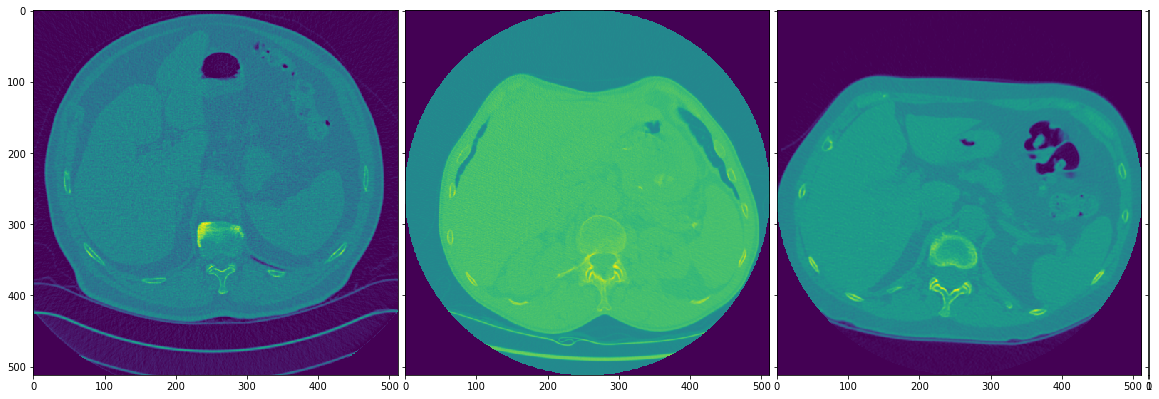

In [123]:
col_cnt = 4
rows_cnt = len(img_list)// col
if len(img_list) % col > 0:
   rows_cnt = rows_cnt + 1 

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(20., 50.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows_cnt,col_cnt),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 #add_all=False,
                 #cbar_mode='edge',
                 share_all=False,
                 )

for ax, im in zip(grid, img_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

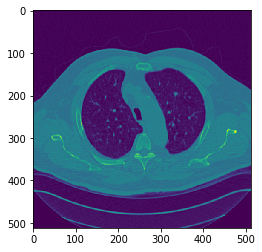

In [120]:
file = '/Users/felix/Downloads/CT_OUTPUT/fb7ae70f05b6441ac4ea7187ce7c45f7/fb7ae70f05b6441ac4ea7187ce7c45f7.npz'
ds =np.load(file)
tmp = ds.f.arr_0
plt.imshow(tmp[0])

In [121]:
tmp = pd.read_csv('/Users/felix/Downloads/CT_OUTPUT/meta.csv')
tmp.head()

,series,sid,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,SpacingBetweenSlices,ImagePositionPatient,SliceLocation,PixelSpacing,RescaleIntercept,RescaleSlope
0,e8be143b9f5e352f71043b24f79f5a17,0,2.25.13079948394596508717750266633630932999777...,2.25.83394187793126168285295993011684946739976...,1.2.840.113654.2.55.66459100470184247692686531...,NaN,"['-203.800003', '-190.800003', '-27.549999']",-27.549999,"['0.669922', '0.669922']",-1024.0,1.0
1,e8be143b9f5e352f71043b24f79f5a17,1,2.25.13079948394596508717750266633630932999777...,2.25.83394187793126168285295993011684946739976...,1.2.840.113654.2.55.14492680870901555785578220...,NaN,"['-203.800003', '-190.800003', '-7.550000']",-7.550000,"['0.669922', '0.669922']",-1024.0,1.0
2,e8be143b9f5e352f71043b24f79f5a17,2,2.25.13079948394596508717750266633630932999777...,2.25.83394187793126168285295993011684946739976...,1.2.840.113654.2.55.88851966386098073496032899...,NaN,"['-203.800003', '-190.800003', '-121.550003']",-121.550003,"['0.669922', '0.669922']",-1024.0,1.0
3,e8be143b9f5e352f71043b24f79f5a17,3,2.25.13079948394596508717750266633630932999777...,2.25.83394187793126168285295993011684946739976...,1.2.840.113654.2.55.92527816572491389959293862...,NaN,"['-203.800003', '-190.800003', '-17.549999']",-17.549999,"['0.669922', '0.669922']",-1024.0,1.0
4,e8be143b9f5e352f71043b24f79f5a17,4,2.25.13079948394596508717750266633630932999777...,2.25.83394187793126168285295993011684946739976...,1.2.840.113654.2.55.11602950767107013822689456...,NaN,"['-203.800003', '-190.800003', '-95.550003']",-95.550003,"['0.669922', '0.669922']",-1024.0,1.0


In [19]:
series.replace(base_fold, output_fold)

series,base_fold, output_fold

('/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_600/concat',
 '/Users/felix/Documents/med_data/**/*.dcm',
 '/Users/felix/Documents/output_dir')

In [102]:
#img_numpy[instance_sn] = img

img_numpy[2] = img



In [82]:
a = np.zeros((2,4,3),dtype=np.int16)
print(a)
a[1] = np.ones((4,3))
a

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=int16)

In [7]:
os.path.dirname
list(glob('/Users/felix/Documents/med_data/**/*.dcm', recursive=True))

['/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_900/concat/rect_noise_0_900_004.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_900/concat/rect_noise_0_900_003.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_900/concat/rect_noise_0_900_002.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_900/concat/rect_noise_0_900_000.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_900/concat/rect_noise_0_900_001.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_300/concat/rect_noise_0_300_001.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_300/concat/rect_noise_0_300_000.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_300/concat/rect_noise_0_300_002.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_300/concat/rect_noise_0_300_003.dcm',
 '/Users/felix/Documents/med_data/dicom_file/rect/rect_noise_0_300/concat/rect_noise_0_300_